In [28]:
import pandas as pd
import numpy as np

# NLP & ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import re
# Save model
import joblib


In [ ]:
from google.colab import files
uploaded = files.upload()

In [29]:
import os
os.listdir()


['.config',
 'SMSSpamCollection',
 'SMSSpamCollection (1)',
 'readme',
 'sample_data']

In [30]:
import pandas as pd

messages = pd.read_csv(
    "SMSSpamCollection",
    sep="\t",
    names=["label", "text"],
    encoding="latin-1"
)

messages.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [31]:
messages.isnull().sum()

,0
label,0
text,0


In [32]:
def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub(r'RT|cc', ' ', resumeText)            # remove RT and cc
    resumeText = re.sub(r'#\S+', '', resumeText)              # remove hashtags
    resumeText = re.sub(r'@\S+', '  ', resumeText)            # remove mentions
    resumeText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)    # remove non-ascii chars
    resumeText = re.sub(r'\s+', ' ', resumeText)              # remove extra whitespace
    return resumeText


<>:6: SyntaxWarning: invalid escape sequence '\]'
<>:6: SyntaxWarning: invalid escape sequence '\]'
/tmp/ipython-input-3556722658.py:6: SyntaxWarning: invalid escape sequence '\]'
  resumeText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations


In [33]:
# Apply text cleaning
messages['clean_text'] = messages['text'].apply(cleanResume)

# Encode labels
messages['label'] = messages['label'].map({'ham': 0, 'spam': 1})

messages.head()


,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",Nah I don t think he goes to usf he lives around here though


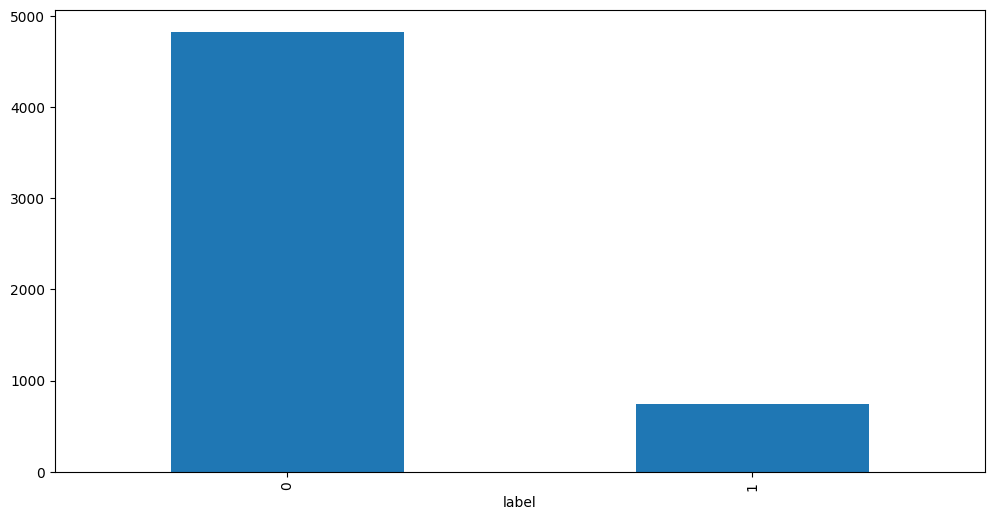

In [34]:
import matplotlib.pyplot as plt
messages['label'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [35]:
X = messages['text']
y = messages['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [36]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_features=5000
    )),
    ('model', LogisticRegression(max_iter=1000))
])


In [37]:
pipeline

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('model', LogisticRegression(max_iter=1000))])

In [38]:
pipeline.fit(X_train, y_train)
print("✅ Model trained successfully")


✅ Model trained successfully


In [40]:
y_pred = pipeline.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9704035874439462
Precision: 1.0
Recall: 0.7785234899328859
F1 Score: 0.8754716981132076

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [41]:
joblib.dump(pipeline, "spam_detection_pipeline.pkl")
print("✅ Pipeline saved")

✅ Pipeline saved


In [48]:
# Load the trained model
loaded_model = joblib.load("spam_detection_pipeline.pkl")

print("Spam Detection App (type 'stop' to exit)\n")

while True:
    # Get user input
    sample_msg = input("Enter your message: ")

    # Exit condition
    if sample_msg.lower() == "stop":
        print("Application closed. Goodbye! 👋")
        break

    # Predict
    prediction = loaded_model.predict([sample_msg])

    # Print result
    print("Result:", "📩 Spam" if prediction[0] == 1 else "📨 Ham")
    print("-"*40)


Spam Detection App (type 'stop' to exit)

Enter your message: You have won a free cruise! Click here to claim your prize now!
Result: 📩 Spam
----------------------------------------
Enter your message: Can we meet for coffee tomorrow at 10 AM?
Result: 📨 Ham
----------------------------------------
Enter your message: wao congradulation dear you are good work 
Result: 📨 Ham
----------------------------------------
Enter your message: stop
Application closed. Goodbye! 👋
